In [0]:
import os
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
sys.path.append('..')

In [2]:
!pip install efficientnet

In [3]:
from keras.applications.imagenet_utils import decode_predictions

from efficientnet import EfficientNetB0
from efficientnet import center_crop_and_resize, preprocess_input


Using TensorFlow backend.


In [4]:
!wget https://c402277.ssl.cf1.rackcdn.com/photos/479/images/story_full_width/giant-panda-shutterstock_86500690.jpg
!ls

--2019-06-02 15:16:13--  https://c402277.ssl.cf1.rackcdn.com/photos/479/images/story_full_width/giant-panda-shutterstock_86500690.jpg
Resolving c402277.ssl.cf1.rackcdn.com (c402277.ssl.cf1.rackcdn.com)... 104.75.172.197
Connecting to c402277.ssl.cf1.rackcdn.com (c402277.ssl.cf1.rackcdn.com)|104.75.172.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141411 (138K) [image/jpeg]
Saving to: ‘giant-panda-shutterstock_86500690.jpg’

giant-panda-shutter 100%[===================>] 138.10K   664KB/s    in 0.2s    

2019-06-02 15:16:13 (664 KB/s) - ‘giant-panda-shutterstock_86500690.jpg’ saved [141411/141411]

giant-panda-shutterstock_86500690.jpg  sample_data


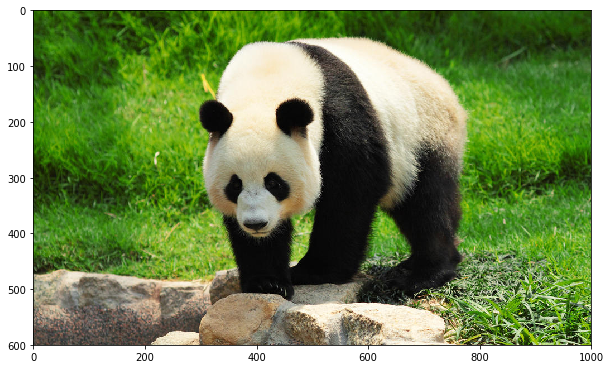

In [5]:
image = imread('giant-panda-shutterstock_86500690.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [6]:
# loading pretrained model
model = EfficientNetB0(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
21856256/21849008 [==============================] - 1s 0us/step


In [7]:
import time
# preprocess input
image_size = model.input_shape[1]
x = center_crop_and_resize(image, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)
ts = time.time()
# make prediction and decode
y = model.predict(x)
print(int(round((time.time() -ts )* 1000)))
decode_predictions(y)

i=0
while i < 10:
  ts = time.time()
  # make prediction and decode
  y = model.predict(x)
  print(int(round((time.time() -ts )* 1000)))
  i += 1

4029
40960/35363 [==================================] - 0s 2us/step
15
12
10
10
10
9
9
10
10
11
